In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tifffile as tf
from skimage import io # import tiff file as ndarray
import seaborn as sns


In [2]:
test_path = "/Volumes/Data/Emily/STP_for_MAPseq/3_brainreg_output/STeg_220429_aligned/ACC_STeg_230308_b1_brainreg_STeg_220429/downsampled_standard.tiff"

# read in file
test = tf.imread(test_path)

In [3]:
# test2 = io.imread(test_path)

14662
1


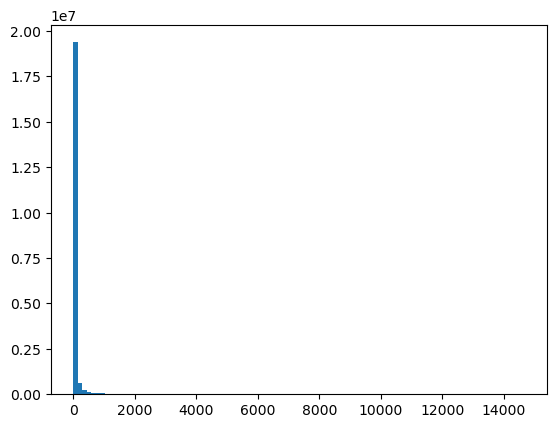

In [4]:
# histogram


test_flat = test.flatten()
test_nzero = test_flat[test_flat!=0]
print(test_nzero.max())
print(test_nzero.min())

plt.hist(test_nzero, bins=100)
# plt.xlim(0,2000)
plt.show()




In [5]:
test2_path = "/Volumes/Data/Emily/STP_for_MAPseq/4_python_output/input_tifs/norm_subtracted/STeg_ACC_230308_align_220429_norm_subtracted.tif"

# read in file
test2 = tf.imread(test2_path)

14641
1


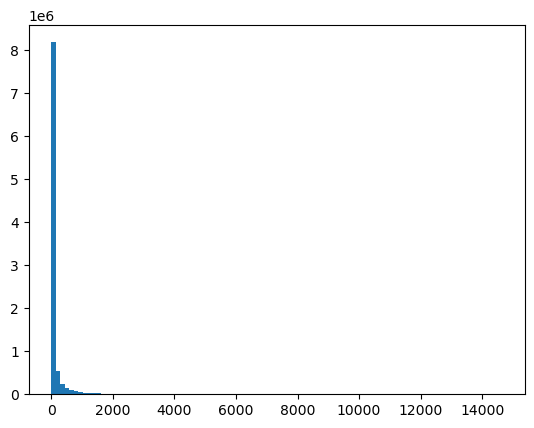

In [6]:
# histogram
test2_flat = test2.flatten()
test2_nzero = test2_flat[test2_flat!=0]
print(test2_nzero.max())
print(test2_nzero.min())

plt.hist(test2_nzero, bins=100)
# plt.xlim(0,2000)
plt.show()




14641
1


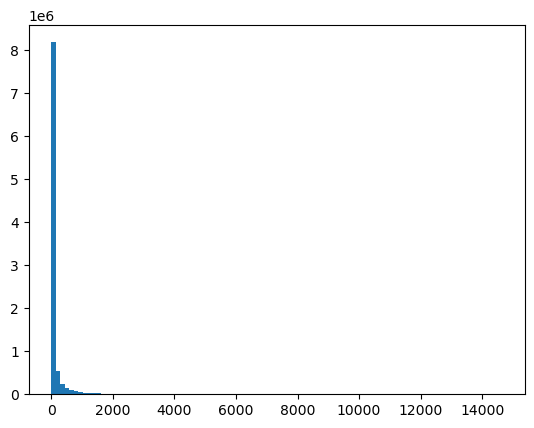

In [29]:
# histogram
test3 = test - 21
test3[test3 > 60000] = 0
test3_flat = test3.flatten()
test3_nzero = test3_flat[test3_flat!=0]
print(test3_nzero.max())
print(test3_nzero.min())

plt.hist(test3_nzero, bins=100)
# plt.xlim(0,2000)
plt.show()


In [30]:
# tf.imwrite("/Volumes/Data/Emily/STP_for_MAPseq/4_python_output/input_tifs/test.tif", test3, imagej=True)


In [33]:
info = pd.read_csv("/Volumes/Data/Emily/STP_for_MAPseq/3_brainreg_output/aligned_file_paths.csv")
info


,brain,path,align_to,species,inj_site,mean_subtract
0,ACC_MMus_230403_b1,/Volumes/Data/Emily/STP_for_MAPseq/3_brainreg_...,STeg_220429,MMus,ACC,16.0
1,ACC_MMus_230404_b2,/Volumes/Data/Emily/STP_for_MAPseq/3_brainreg_...,STeg_220429,MMUs,ACC,20.6
2,ACC_STeg_230308_b1,/Volumes/Data/Emily/STP_for_MAPseq/3_brainreg_...,STeg_220429,STeg,ACC,21.0
3,ACC_STeg_230322_b2,/Volumes/Data/Emily/STP_for_MAPseq/3_brainreg_...,STeg_220429,STeg,ACC,21.0
4,ACC_STeg_230501_b3,/Volumes/Data/Emily/STP_for_MAPseq/3_brainreg_...,STeg_220429,STeg,ACC,19.7
5,OMC_MMus_220119_b0,/Volumes/Data/Emily/STP_for_MAPseq/3_brainreg_...,STeg_220429,MMus,OMC,299.0
6,OMC_MMus_220303_b1,/Volumes/Data/Emily/STP_for_MAPseq/3_brainreg_...,STeg_220429,MMus,OMC,257.0
7,OMC_MMus_220324_b2,/Volumes/Data/Emily/STP_for_MAPseq/3_brainreg_...,STeg_220429,MMus,OMC,379.5
8,OMC_STeg_220208_b0,/Volumes/Data/Emily/STP_for_MAPseq/3_brainreg_...,STeg_220429,STeg,OMC,309.0
9,OMC_STeg_220411_b1,/Volumes/Data/Emily/STP_for_MAPseq/3_brainreg_...,STeg_220429,STeg,OMC,313.6


In [35]:
name = info.loc[0, 'brain']+'_aligned_to_'+info.loc[0,'align_to']+"_norm_subtracted.tif"
name

'ACC_MMus_230403_b1_aligned_to_STeg_220429_norm_subtracted.tif'

# histograms


In [ ]:
# read in images
steg_omc_1

# Create OMCc filter

In [3]:
from STP_processing import make_mask
from skimage import io # import tiff file as ndarray

in_path = "/Volumes/Data/Emily/STP_for_MAPseq/4_python_output/input_tifs/"
steg_reg_atlas = io.imread(in_path+"Steg_220429_registered_atlas_RESIZED.tif", plugin="tifffile")
steg_reg_hemis = io.imread(in_path+"Steg_220429_registered_hemispheres_RESIZED.tif", plugin="tifffile")
# mmus_reg_atlas = io.imread(in_path+"MMus_220303_registered_atlas_RESIZED.tif", plugin="tifffile")


In [4]:

# OMCc - left, MOs, MOp
mos = make_mask("MOs", steg_reg_atlas)
mop = make_mask("MOp", steg_reg_atlas)
left_hemi = steg_reg_hemis==2


In [6]:
import numpy as np
omc = np.add(mos,mop)
omcc = np.multiply(omc, left_hemi)
omcc[omcc > 0] = 1
omcc[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])